# AB Testing Mobile Game 

<p>This project is based on a mini project from <a href="https://www.datacamp.com/projects/184">Datacamp</a>.</p>
<p><a href="https://www.facebook.com/cookiecatsgame">Cookie Cats</a> is a hugely popular mobile puzzle game developed by <a href="http://tactile.dk">Tactile Entertainment</a>. It's a classic "connect three"-style puzzle game where the player must connect tiles of the same color to clear the board and win the level. It also features singing cats. Check out this short demo:</p>
<p><a href="https://youtu.be/GaP5f0jVTWE"><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cookie_cats_video.jpeg" style="width: 500px"></a></p>
<p>As players progress through the levels of the game, they will <strong>occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress</strong>. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.<p>But where should the gates be placed? Initially the first gate was placed at level 30. <strong>In this project, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention.</strong> </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png" alt=""></p>

<p>The data is from 90,189 players that installed the game while the AB-test was running. The variables are:</p>
<ul>
<li><code>userid</code> - a unique number that identifies each player.</li>
<li><code>version</code> - whether the player was put in the control group (<code>gate_30</code> - a gate at level 30) or the test group (<code>gate_40</code> - a gate at level 40).</li>
<li><code>sum_gamerounds</code> - the number of game rounds played by the player during the first week after installation
<li><code>retention_1</code> - did the player come back and play 1 day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after installing?</li>
</ul>
<p>When a player installed the game, he or she was randomly assigned to either <code>gate_30</code> or <code>gate_40</code>. </p>

### AB Testing Process

1. Understanding business problem & data
2. Detect and resolve problems in the data (Missing Value, Outliers, Unexpected Value)
3. Look summary stats and plots
4. Apply hypothesis testing and check assumptions
    - Check Normality & Homogeneity
    - Apply tests (Shapiro, Levene Test, T-Test, Welch Test, Mann Whitney U Test)
5. Evaluate the results
6. Make inferences 
7. Recommend business decision to your customer/director/ceo etc. 

## <font color="darkcyan">Libraries and Packages</font>

In [1]:
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

# Hypothesis Testing
from scipy.stats import shapiro
import scipy.stats as stats

# Configuration
import warnings
pd.options.display.float_format = '{:.4f}'.format
pd.set_option('display.max_columns', None)
# Plotting setup
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline

## <font color="darkcyan">Loading the data</font>

In [2]:
# load dataset
df = pd.read_csv("cookie_cats.csv")    
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [3]:
# Check shape of data
df.shape

(90189, 5)

In [4]:
# Check unique user_id's in dataset
print(df.userid.unique().shape)

(90189,)


In [5]:
# Check is there any null value  
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [6]:
df.groupby('version').sum_gamerounds.agg(['count','median','std','mean','max'])

,count,median,std,mean,max
version,,,,,
gate_30,44700,17,256.7164,52.4563,49854
gate_40,45489,16,103.2944,51.2988,2640


## <font color="darkcyan">Detect and Delete Outliers</font>

<AxesSubplot:xlabel='version', ylabel='sum_gamerounds'>

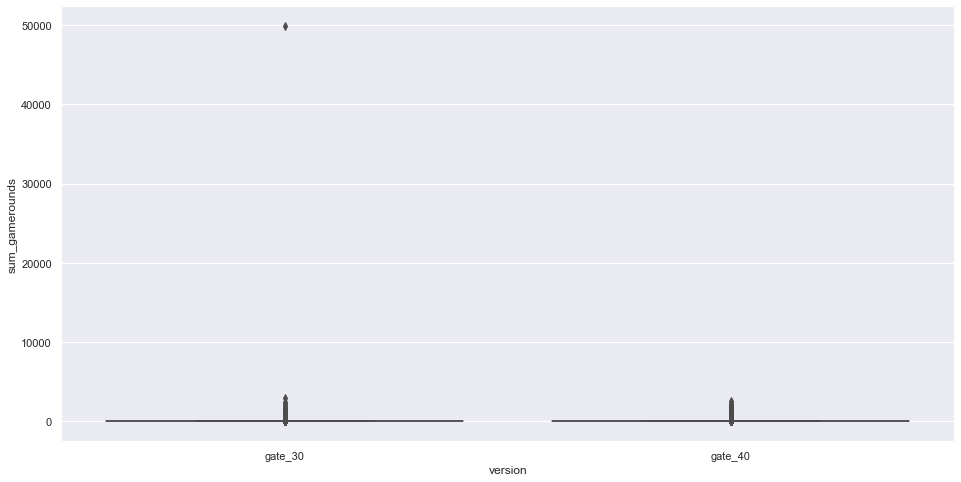

In [7]:
plt.rcParams['figure.figsize'] = (16, 8)

sns.boxplot(x = df.version, y = df.sum_gamerounds)

In [8]:
df = df[df['sum_gamerounds'] < 4800]

## <font color="darkcyan">Look summary stats and plots</font>

Text(0.5, 1.0, 'Distribution of Two Groups')

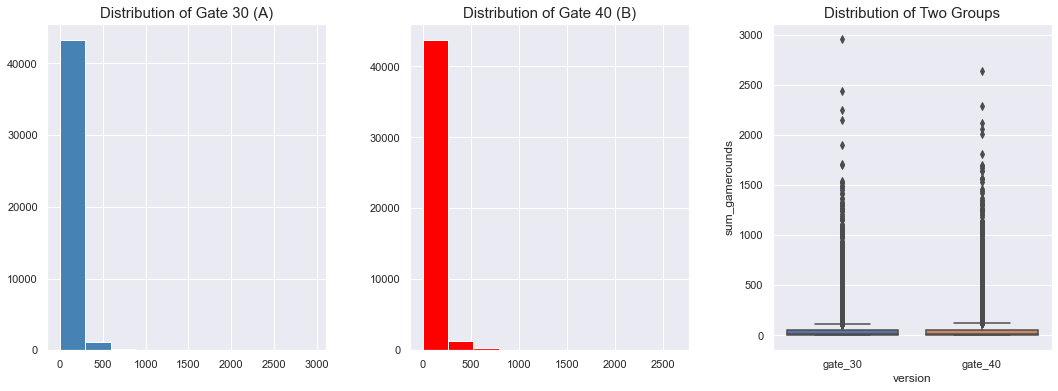

In [9]:
fig, axes = plt.subplots(1, 3, figsize = (18,6))


df[(df.version == "gate_30")].hist("sum_gamerounds", ax = axes[0], color = "steelblue")
df[(df.version == "gate_40")].hist("sum_gamerounds", ax = axes[1], color = "red")
sns.boxplot(x = df.version, y = df.sum_gamerounds)

axes[0].set_title("Distribution of Gate 30 (A)", fontsize = 15)
axes[1].set_title("Distribution of Gate 40 (B)", fontsize = 15)
axes[2].set_title("Distribution of Two Groups", fontsize = 15)

<a id='details'></a>
<h1 style="color:DarkSlateBlue" >SOME DETAILS</h1>

**The users installed the game but 3994 users never played the game!** Some reasons might explain this situation.

- They have no free time to play game
- Users might prefer to play other games or they play other games already
- Some users don't like the app etc.
- You can comment below for this users also
- The gmae might have some issuse in some phones 

**The number of users decreases as the levels progress**

- Most of users played the game at early stage and they didn't progress.
- Tactile Entertainment should learn why users churn playing the game.
- Doing research and collecting data about the game and users would help to understand user churn
- The difficulty of the game can be measured
- Gifts might help player retention

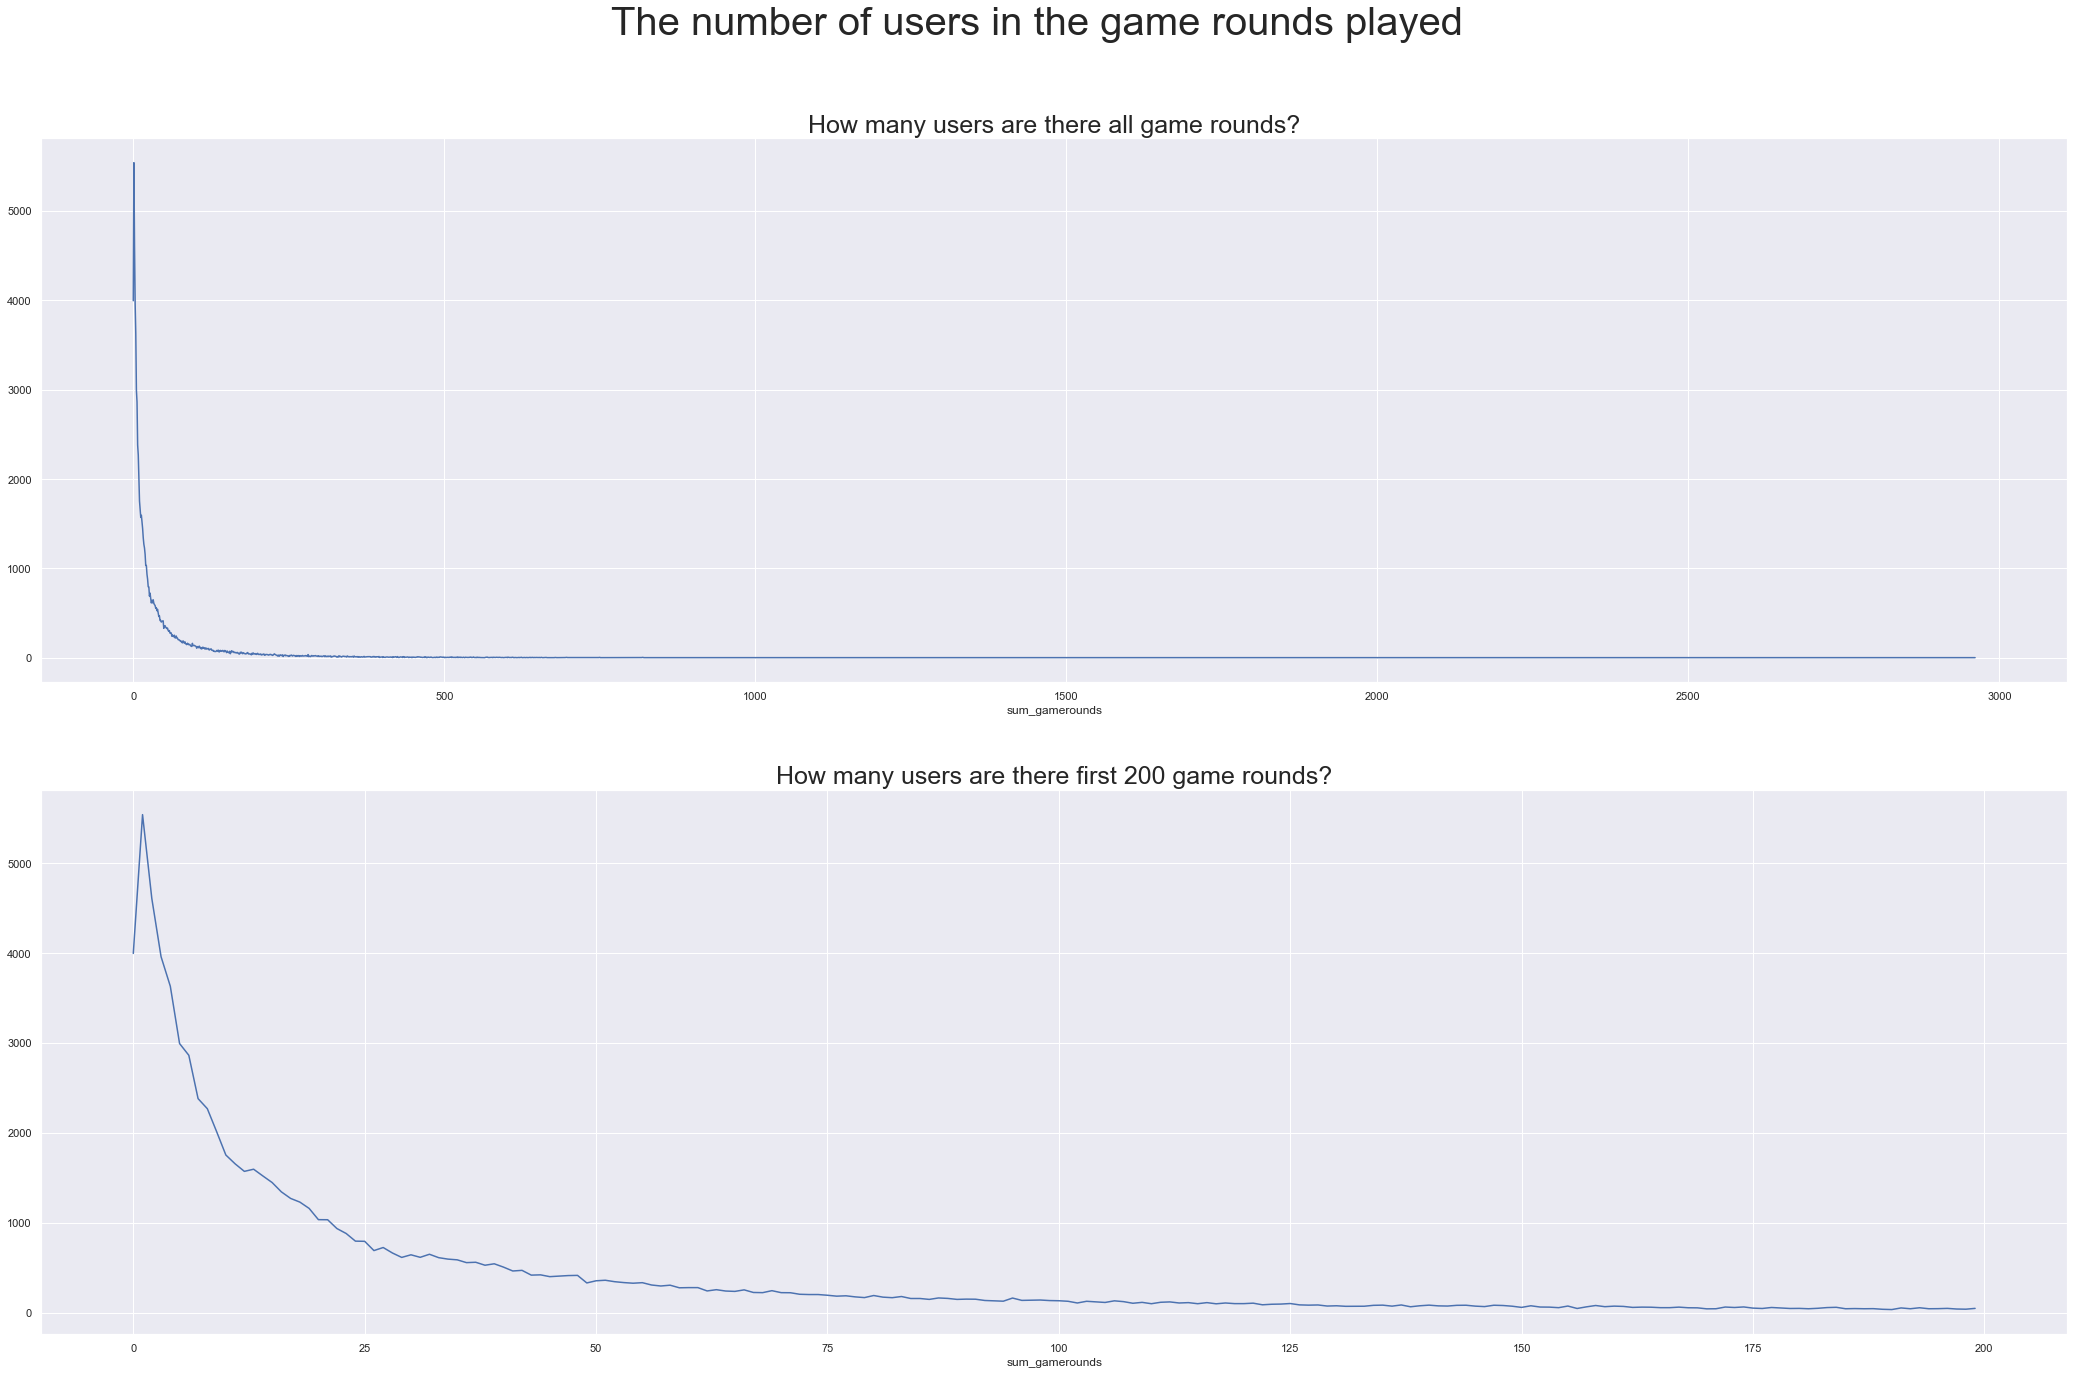

In [10]:
fig, axes = plt.subplots(2, 1, figsize = (30,20))
df.groupby("sum_gamerounds").userid.count().plot(ax = axes[0])
df.groupby("sum_gamerounds").userid.count()[:200].plot(ax = axes[1])
plt.suptitle("The number of users in the game rounds played", fontsize = 40)
axes[0].set_title("How many users are there all game rounds?", fontsize = 25)
axes[1].set_title("How many users are there first 200 game rounds?", fontsize = 25)
plt.tight_layout(pad=5);

In [11]:
df.groupby("sum_gamerounds").userid.count().loc[[30,40]]

sum_gamerounds
30    642
40    505
Name: userid, dtype: int64

In [12]:
df.groupby("version").sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44699,17,51.3421,102.0576,2961
gate_40,45489,16,51.2988,103.2944,2640


**Retention variables gives us player retention details.**

<li><code>retention_1</code> - did the player come back and play 1 day after installing?</li>
<li><code>retention_7</code> - did the player come back and play 7 days after installing?</li>

Also players tend not to play the game! There are many players who quit the game.

- 55 percent of the players didn't play the game 1 day after insalling
- 81 percent of the players didn't play the game 7 day after insalling

In [13]:
df.groupby(["version", "retention_1"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median    mean      std   max
version retention_1                                      
gate_30 False        24665       6 16.3591  36.5284  1072
        True         20034      48 94.4117 135.0377  2961
gate_40 False        25370       6 16.3404  35.9258  1241
        True         20119      49 95.3812 137.8873  2640

In [14]:
df.groupby(["version", "retention_7"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"])

count  median     mean      std   max
version retention_7                                       
gate_30 False        36198      11  25.7965  43.3162   981
        True          8501     105 160.1175 179.3586  2961
gate_40 False        37210      11  25.8564  44.4061  2640
        True          8279     111 165.6498 183.7925  2294

In [15]:
df["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), df.retention_1, df.retention_7))
df.groupby(["version", "NewRetention"]).sum_gamerounds.agg(["count", "median", "mean", "std", "max"]).reset_index()

,version,NewRetention,count,median,mean,std,max
0,gate_30,False-False,22840,6,11.8197,21.6426,981
1,gate_30,False-True,1825,43,73.1693,93.2223,1072
2,gate_30,True-False,13358,33,49.6945,58.1254,918
3,gate_30,True-True,6676,127,183.8863,189.6264,2961
4,gate_40,False-False,23597,6,11.9133,20.9010,547
5,gate_40,False-True,1773,47,75.2611,94.4780,1241
6,gate_40,True-False,13613,32,50.0255,60.9246,2640
7,gate_40,True-True,6506,133,190.2824,194.2201,2294


<a id='ab'></a>
<h1 style="color:DarkSlateBlue" >A/B Testing</h1>

### Assumptions:
- Check normality
- If Normal Distribution, check homogeneity

### Steps:
- Split & Define Control Group & Test Group
- Apply Shapiro Test for normality
- If parametric apply Levene Test for homogeneity of variances
- If Parametric + homogeneity of variances apply T-Test
- If Parametric - homogeneity of variances apply Welch Test
- If Non-parametric apply Mann Whitney U Test directly

In [16]:
# Define A/B groups
df["version"] = np.where(df.version == "gate_30", "A", "B")
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7,NewRetention
0,116,A,3,False,False,False-False
1,337,A,38,True,False,True-False
2,377,B,165,True,False,True-False
3,483,B,1,False,False,False-False
4,488,B,179,True,True,True-True


In [17]:
# A/B Testing Function - Quick Solution
def AB_Test(dataframe, group, target):
    
    # Split A/B
    groupA = dataframe[dataframe[group] == "A"][target]
    groupB = dataframe[dataframe[group] == "B"][target]
    
    # Assumption: Normality
    ntA = shapiro(groupA)[1] < 0.05
    ntB = shapiro(groupB)[1] < 0.05
    # H0: Distribution is Normal! - False
    # H1: Distribution is not Normal! - True
    
    
    # "If H0: Normal Distribution"
    if (ntA == False) & (ntB == False): 
        # Parametric Test
        # Assumption: Homogeneity of variances
        leveneTest = stats.levene(groupA, groupB)[1] < 0.05
        # H0: Homogeneity: False
        # H1: Heterogeneous: True
        
        # "If H0: Homogeneity of variances"
        if leveneTest == False:
            # Homogeneity
            ttest = stats.ttest_ind(groupA, groupB, equal_var=True)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
        else:
            # Heterogeneous
            ttest = stats.ttest_ind(groupA, groupB, equal_var=False)[1]
            # H0: M1 == M2 - False
            # H1: M1 != M2 - True
    else:
        # Non-Parametric Test
        ttest = stats.mannwhitneyu(groupA, groupB)[1] 
        # H0: M1 == M2 - False
        # H1: M1 != M2 - True
        
    # Put Result into a Dataframe
    temp = pd.DataFrame({
        "AB Hypothesis":[ttest < 0.05], 
        "p-value":[ttest]
    })

    temp["Test Type"] = np.where((ntA == False) & (ntB == False), "Parametric", "Non-Parametric")
    temp["AB Hypothesis"] = np.where(temp["AB Hypothesis"] == False, "Fail to Reject H0", "Reject H0")
    temp["Comment"] = np.where(temp["AB Hypothesis"] == "Fail to Reject H0", "A/B groups are similar!", "A/B groups are not similar!")
    
    if (ntA == False) & (ntB == False):
        temp["Homogeneity"] = np.where(leveneTest == False, "Yes", "No")
        temp = temp[["Test Type", "Homogeneity","AB Hypothesis", "p-value", "Comment"]]
    else:
        temp = temp[["Test Type","AB Hypothesis", "p-value", "Comment"]]
    
    # Print Hypothesis
    print("# A/B Testing Hypothesis")
    print("H0: A == B")
    print("H1: A != B", "\n")
    
    return temp
    
    
    
# Apply A/B Testing
AB_Test(dataframe=df, group = "version", target = "sum_gamerounds")

# A/B Testing Hypothesis
H0: A == B
H1: A != B 



,Test Type,AB Hypothesis,p-value,Comment
0,Non-Parametric,Fail to Reject H0,0.0509,A/B groups are similar!


<a id='conclusion'></a>
<h1 style="color:DarkSlateBlue" >7. Conclusion</h1>

### Remember business problem!

**As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention and game rounds.**

Firstly, we investigated relationships and structures in the data. There was no missing value problem but was one outlier problem in the data. Summary stats and plots help us to understand the data and problem.

Before A/B Testing, we shared some details about game, players, problems and suggestion to our customer/director/ceo etc.

After applying A/B Testing, the analysis result gives us some important information. Shapiro Testing rejected H0 for Normality assumption. Therefore we needed to apply a Non-parametric test as called Mann Whitney U to compare two groups. As a result, Mann Whitney U Testing rejected H0 hypothesis and we learned A/B groups are not similar!

Briefly, There are statistically significant difference between two groups about moving first gate from level 30 to level 40 for game rounds. 

### Which level has more advantages in terms of player retention?

1-day and 7-day average retention are higher when the gate is at level 30 than when it is at level 40.